In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [46]:
df_1=pd.read_excel('/CO-O3.xlsx',skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22])

df_1.head()

,From Date,To Date,CO,Ozone
0,03-01-2020 00:00,03-01-2020 08:00,0.68,18.88
1,03-01-2020 08:00,03-01-2020 16:00,0.97,25.26
2,03-01-2020 16:00,04-01-2020 00:00,1.18,25.1
3,04-01-2020 00:00,04-01-2020 08:00,0.81,25.14
4,04-01-2020 08:00,04-01-2020 16:00,1.21,29


In [47]:
df_1.shape

(3234, 4)

In [48]:
df_1.columns

Index(['From Date', 'To Date', 'CO', 'Ozone'], dtype='object')

In [49]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  3234 non-null   object
 1   To Date    3234 non-null   object
 2   CO         3234 non-null   object
 3   Ozone      3234 non-null   object
dtypes: object(4)
memory usage: 101.2+ KB


In [50]:
df_1.isnull().sum()


From Date    0
To Date      0
CO           0
Ozone        0
dtype: int64

In [51]:
df_1.replace(to_replace='None',value=0.00,inplace=True)
df_1.head()

,From Date,To Date,CO,Ozone
0,03-01-2020 00:00,03-01-2020 08:00,0.68,18.88
1,03-01-2020 08:00,03-01-2020 16:00,0.97,25.26
2,03-01-2020 16:00,04-01-2020 00:00,1.18,25.10
3,04-01-2020 00:00,04-01-2020 08:00,0.81,25.14
4,04-01-2020 08:00,04-01-2020 16:00,1.21,29.00


# **convertin the Date columns into pandas datetime data formate**


In [53]:
type(df_1['From Date'][1])

str

In [55]:
df_1['From Date'] = pd.to_datetime(df_1['From Date'],format='%d-%m-%Y %H:%M')
df_1.head()

,From Date,To Date,CO,Ozone
0,2020-01-03 00:00:00,03-01-2020 08:00,0.68,18.88
1,2020-01-03 08:00:00,03-01-2020 16:00,0.97,25.26
2,2020-01-03 16:00:00,04-01-2020 00:00,1.18,25.10
3,2020-01-04 00:00:00,04-01-2020 08:00,0.81,25.14
4,2020-01-04 08:00:00,04-01-2020 16:00,1.21,29.00


In [65]:
type(df_1['From Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

observing the date columns, we can see that each from and to date row consist of data from a single day... Hence for ease of analysis, we can form a separate column labelling the day 

In [68]:
df_1['Day'] = df_1.index+1
df_1.head()

,From Date,To Date,CO,Ozone,Day
0,2020-01-03 00:00:00,03-01-2020 08:00,0.68,18.88,1
1,2020-01-03 08:00:00,03-01-2020 16:00,0.97,25.26,2
2,2020-01-03 16:00:00,04-01-2020 00:00,1.18,25.10,3
3,2020-01-04 00:00:00,04-01-2020 08:00,0.81,25.14,4
4,2020-01-04 08:00:00,04-01-2020 16:00,1.21,29.00,5


**visualizing the** **data**


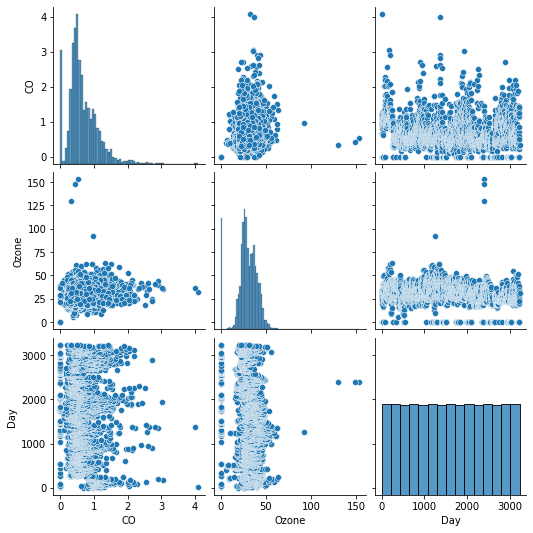

In [69]:
sns.pairplot(df_1)

In [60]:
df_1.corr()

,CO,Ozone,Day
CO,1.000000,0.369555,-0.112215
Ozone,0.369555,1.000000,-0.205429
Day,-0.112215,-0.205429,1.000000


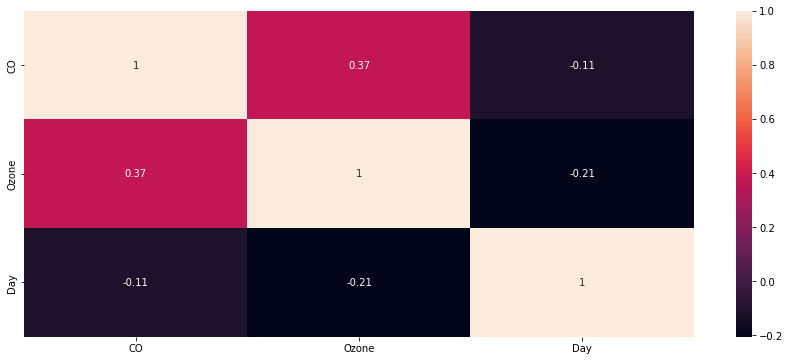

In [64]:
plt.figure(figsize=(15,6))
sns.heatmap(df_1.corr(),annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


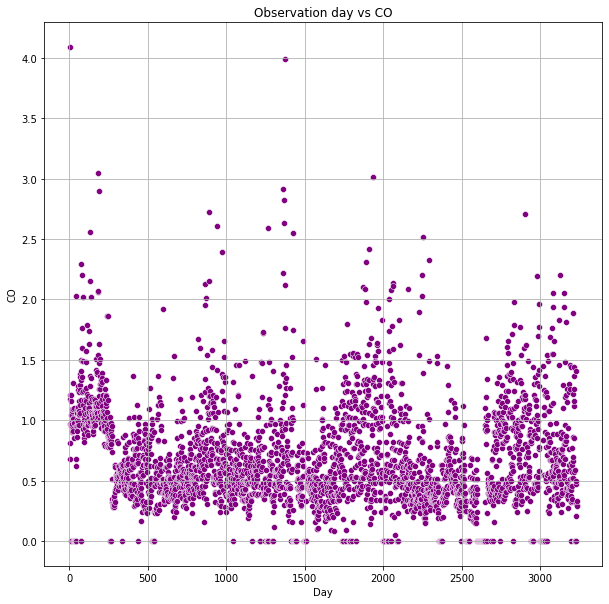

In [73]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_1.Day,df_1.CO,color='purple')
plt.title('Observation day vs CO')
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


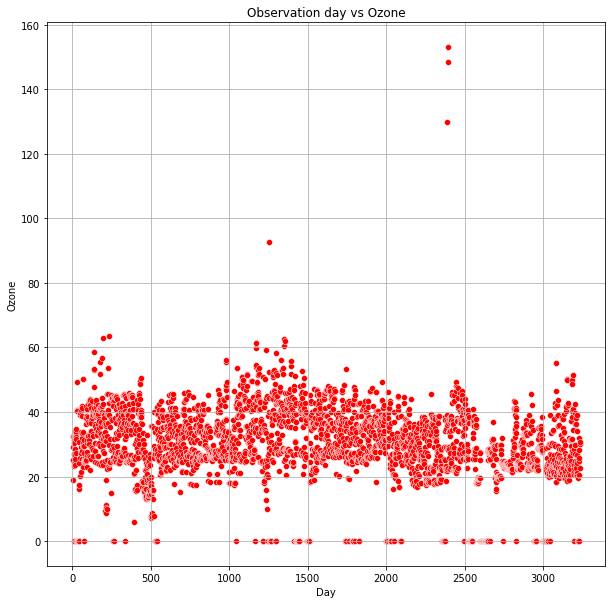

In [72]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_1.Day,df_1.Ozone,color='red')
plt.title('Observation day vs Ozone')
plt.grid()
plt.show()

